# Support Vector Regression
##### Using SVR to predict the MPG of vehicles

SVR(Support Vector Regression) - uses the same underlying principles as SVM but with a different objective function
- is used for predicting continuous values

In [2]:
import pandas as pd

### Download Auto MPG data set
<b>Download Link:</b> https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

<b>Summary:</b> Given 8 pieces of information (features) about a vehicle, predict its mileage

<b>Notes:</b>
* The file does not come with headers, so we specify them explicitly

In [3]:
auto_data = pd.read_csv('../data/auto-mpg.data', delim_whitespace = True, header=None,
                   names = ['mpg', 
                            'cylinders', 
                            'displacement', 
                            'horsepower', 
                            'weight', 
                            'acceleration',
                            'model', 
                            'origin', 
                            'car_name'])


In [4]:
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


#### Check if the car_name feature can be helpful

In [5]:
len(auto_data['car_name'].unique())

305

In [6]:
len(auto_data['car_name'])

398

#### Drop the car_name feature from the data frame
There are too many unique values for any pattern to be detected

In [7]:
auto_data = auto_data.drop('car_name', axis=1)
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


#### Converting a numeric value for origin to something more meaningful
* The values 1,2,3 represent America, Europe and Asia respectively
* This is the first step before we apply one-hot-encoding for this feature
* Renaming will give us more meaningful column names after one-hot-encoding is applied

In [8]:
auto_data['origin'] = auto_data['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,america
1,15.0,8,350.0,165.0,3693.0,11.5,70,america
2,18.0,8,318.0,150.0,3436.0,11.0,70,america
3,16.0,8,304.0,150.0,3433.0,12.0,70,america
4,17.0,8,302.0,140.0,3449.0,10.5,70,america


#### Applying one-hot-encoding now will give us more meaningful column names

In [9]:
auto_data = pd.get_dummies(auto_data, columns=['origin'])
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


#### Convert missing values in data frame to NaN

In [10]:
import numpy as np

auto_data = auto_data.replace('?', np.nan)

#### Drop rows with missing values

In [11]:
auto_data = auto_data.dropna()
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


### Prepare training and test data
* Define the feature vector (X) and label (Y)
* Use train_test_split to create data subsets sets for training and validations 
* The test_size parameter specifies the proportion of the data required for testing

In [12]:
from sklearn.model_selection import train_test_split

X = auto_data.drop('mpg', axis=1)

# Taking the labels (mpg)
Y = auto_data['mpg']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#### Define the Regression model
* Use scikit-learn's SVR model
* We start off with a linear kernel and set the regularization variable (C) to 1.0
* The model is trained with the training data

In [13]:
from sklearn.svm import SVR
regression_model = SVR(kernel='linear', C=1.0)
regression_model.fit(X_train, Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

#### Check the coefficients for each of the features

In [14]:
regression_model.coef_

array([[-0.65131731,  0.10313732, -0.16190965, -0.00896875,  0.4332911 ,
         0.85408954, -1.85266565,  0.70061963,  1.15204602]])

#### Get R-square value with training data

In [15]:
regression_model.score(X_train, Y_train)

0.6193757170869002

#### Use matplotlib to view the coefficients as a histogram

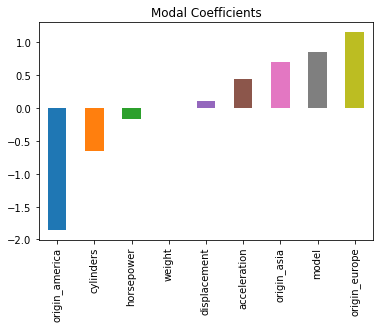

In [16]:
from pandas import Series
import matplotlib.pyplot as plt
%matplotlib inline

predictors = X_train.columns
coef = Series(regression_model.coef_[0],predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

#### Get predictions on test data

In [17]:
from sklearn.metrics import mean_squared_error

y_predict = regression_model.predict(x_test)

#### Compare the predicted and actual values of the MPG

Populating the interactive namespace from numpy and matplotlib


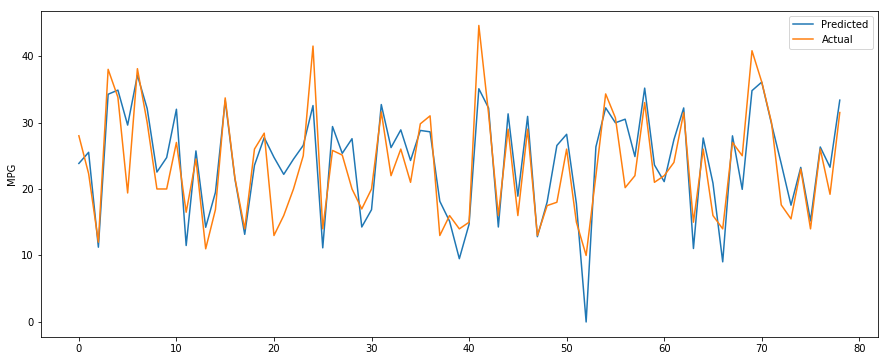

In [18]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('MPG')

plt.legend()
plt.show()

#### Get R-square value of predictions on test data

In [19]:
regression_model.score(x_test, y_test)

0.7189384368816836

#### Calculate Mean Square Error

In [20]:
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_model_mse

17.469469948804594

#### Root of Mean Square Error to measure degree to which our prediction is off

In [21]:
import math

math.sqrt(regression_model_mse)

4.179649500712302